## Data testing

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

In [151]:
df = pd.DataFrame.from_csv('../data/scan.csv')
df['signal'] = df['signal'].str.strip(' dBm').astype('float')
df['label'] = df.apply(lambda x: '\n'.join([x['dev'], str(x['signal'])]), axis=1)
df.head()

,bssid,dev,freq,node,signal,ssid,ap,label
0,64:66:b3:ce:21:db,wlan1,2437,nuc11,-71.0,68-test,nuc10,wlan1\n-71.0
1,64:66:b3:ce:21:db,wlan0,2437,nuc11,-68.0,68-test,nuc10,wlan0\n-68.0
2,56:8b:3c:d0:48:b6,wlan1,5200,nuc11,-83.0,Intelligent-Mesh-5GHz,nuc10,wlan1\n-83.0
3,56:8b:3c:d0:48:b6,wlan0,5200,nuc11,-81.0,Intelligent-Mesh-5GHz,nuc10,wlan0\n-81.0
4,a0:cf:5b:3f:87:4e,wlan1,5660,nuc11,-78.0,TUB-Guest,nuc10,wlan1\n-78.0


In [153]:
df_twist = df[df['ssid'] == 'twist-test']
df_twist

,bssid,dev,freq,node,signal,ssid,ap,label
7,02:5d:60:77:86:72,wlan1,2412,nuc11,-82.0,twist-test,nuc10,wlan1\n-82.0
20,02:5d:60:77:86:72,wlan1,2412,nuc12,-60.0,twist-test,nuc10,wlan1\n-60.0
21,02:5d:60:77:86:72,wlan0,2412,nuc12,-54.0,twist-test,nuc10,wlan0\n-54.0
63,02:5d:60:77:86:72,wlan1,2412,nuc4,-55.0,twist-test,nuc10,wlan1\n-55.0
64,02:5d:60:77:86:72,wlan0,2412,nuc4,-65.0,twist-test,nuc10,wlan0\n-65.0
81,02:5d:60:77:86:72,wlan1,2412,nuc6,-72.0,twist-test,nuc10,wlan1\n-72.0
105,02:5d:60:77:86:72,wlan1,5240,nuc12,-76.0,twist-test,nuc10,wlan1\n-76.0
145,02:5d:60:77:86:72,wlan1,5240,nuc4,-67.0,twist-test,nuc10,wlan1\n-67.0
165,02:5d:60:77:86:72,wlan1,5240,nuc6,-75.0,twist-test,nuc10,wlan1\n-75.0
186,02:5d:60:77:7e:ff,wlan1,2412,nuc10,-76.0,twist-test,nuc11,wlan1\n-76.0


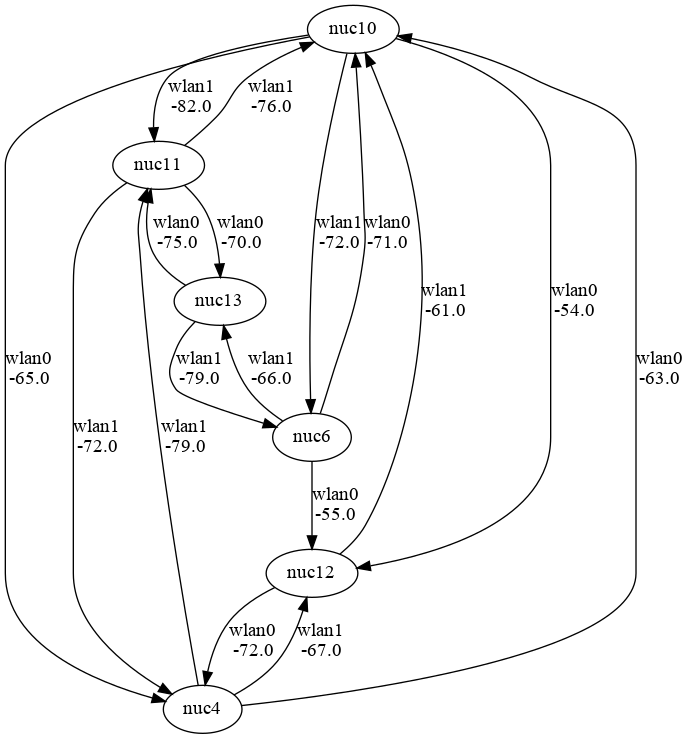

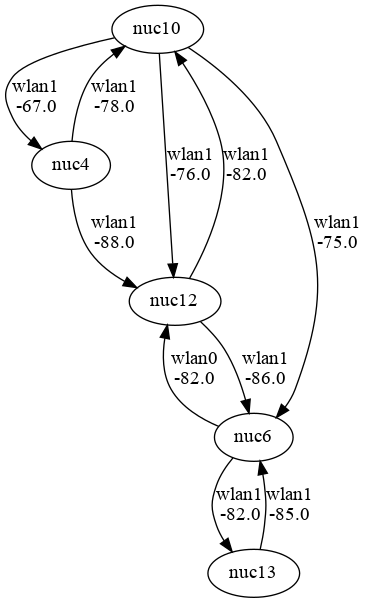

In [154]:
for freq in df_twist['freq'].unique():
    G = nx.from_pandas_dataframe(
        df_twist[df_twist['freq'] == freq],
        'ap', 'node',
        ['label', 'signal'],
        create_using=nx.DiGraph())
    pos = nx.spectral_layout(G)
    P = nx.nx_pydot.to_pydot(G)
    display.display(display.Image(P.create_png()))

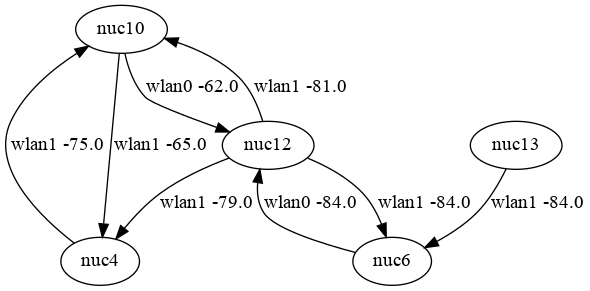

In [131]:
P = nx.nx_pydot.to_pydot(G)
display.display(display.Image(P.create_png()))

In [114]:
nx.draw_networkx(G, 
    pos,
    node_color='#A0CBE2', 
    edge_color=range(20), 
    width=4, edge_cmap=plt.cm.Blues, with_labels=False)

ValueError: edge_color must be a single color or list of exactly m colors where m is the number or edges

KeyError: ('nuc10', 'nuc12')